In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
predict_bike = pd.read_csv('bike_predict.csv', low_memory=False)

In [3]:
predict_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              686 non-null    int64  
 1   duration_x           686 non-null    int64  
 2   end_station_x        686 non-null    int64  
 3   bike_id_x            686 non-null    int64  
 4   passholder_type_x    686 non-null    object 
 5   Date_e_x             686 non-null    object 
 6   Weekday_e_x          686 non-null    int64  
 7   Hour_e_x             686 non-null    int64  
 8   avg_trip_count       686 non-null    float64
 9   idle_time_minutes_x  686 non-null    float64
 10  idle_bikes_count     686 non-null    int64  
 11  temperature          686 non-null    float64
 12  windspeed            686 non-null    float64
 13  bad_weather          686 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 75.2+ KB


In [4]:
predict_bike

,trip_id,duration_x,end_station_x,bike_id_x,passholder_type_x,Date_e_x,Weekday_e_x,Hour_e_x,avg_trip_count,idle_time_minutes_x,idle_bikes_count,temperature,windspeed,bad_weather
0,365198537,11,3012,3289,Indego365,2021-01-01,4,11,14.702778,1609.0,11,-2.0,6.0,0
1,365258430,7,3163,3289,Indego30,2021-01-02,5,14,25.946502,77.0,3,8.0,15.0,0
2,365261890,48,3163,3289,Day Pass,2021-01-02,5,16,21.129173,2378.0,12,12.0,28.0,0
3,365361027,8,3014,3289,Indego30,2021-01-04,0,8,21.129173,494.0,1,2.0,11.0,0
4,365373128,6,3182,3289,Indego30,2021-01-04,0,16,7.330914,7375.0,51,5.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,576921425,43,3245,3289,Indego30,2022-12-20,1,20,12.035581,12.0,0,5.0,15.0,0
682,576932650,40,3210,3289,Indego30,2022-12-20,1,21,12.035581,1.0,0,4.0,13.0,0
683,576932606,21,3245,3289,Indego30,2022-12-20,1,21,8.800830,626.0,1,4.0,11.0,0
684,577042144,7,3065,3289,Indego30,2022-12-21,2,8,12.035581,10626.0,20,-2.0,7.0,0


In [5]:
predict_bike['month'] = pd.to_datetime(predict_bike['Date_e_x']).dt.month
from sklearn.preprocessing import OneHotEncoder

# Create a dictionary to map months to their corresponding season
seasons = {
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
    1: 'Winter',
    2: 'Winter'
}

predict_bike['season'] = predict_bike['month'].map(seasons)
encoder = OneHotEncoder(sparse=False)
predict_bike['season'] = encoder.fit_transform(predict_bike[['season']])

C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
predict_bike['hour_sin'] = np.sin(2 * np.pi * predict_bike['Hour_e_x'] / 24)
predict_bike['hour_cos'] = np.cos(2 * np.pi * predict_bike['Hour_e_x'] / 24)

In [7]:
predict_bike['avg_duration_passholder'] = predict_bike.groupby(['passholder_type_x'])['duration_x'].transform('mean')

In [8]:
predict_bike['passholder_indego'] = np.where((predict_bike['passholder_type_x'] == 'Indego30') | (predict_bike['passholder_type_x'] == 'Indego365'), 1, 0)
predict_bike.drop('passholder_type_x', axis=1, inplace=True)
predict_bike['is_weekday'] = np.where((predict_bike['Weekday_e_x'] < 5), 1, 0)
predict_bike.drop('Weekday_e_x', axis=1, inplace=True)

In [9]:
predict_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  686 non-null    int64  
 1   duration_x               686 non-null    int64  
 2   end_station_x            686 non-null    int64  
 3   bike_id_x                686 non-null    int64  
 4   Date_e_x                 686 non-null    object 
 5   Hour_e_x                 686 non-null    int64  
 6   avg_trip_count           686 non-null    float64
 7   idle_time_minutes_x      686 non-null    float64
 8   idle_bikes_count         686 non-null    int64  
 9   temperature              686 non-null    float64
 10  windspeed                686 non-null    float64
 11  bad_weather              686 non-null    int64  
 12  month                    686 non-null    int64  
 13  season                   686 non-null    float64
 14  hour_sin                 6

In [10]:
predict_bike.drop(['trip_id', 'duration_x', 'Date_e_x'], axis=1, inplace=True)

In [11]:
poi = pd.read_csv('Counted_POI.csv', low_memory=False)
poi.describe()

,Station,POI_Count
count,198.000000,198.000000
mean,3145.045455,17.797980
std,92.322888,20.621796
min,3004.000000,0.000000
25%,3059.250000,4.000000
50%,3152.500000,9.000000
75%,3235.750000,24.000000
max,3300.000000,100.000000


In [12]:
predict_bike = predict_bike.merge(poi, left_on='end_station_x', right_on='Station', how='left')
predict_bike.drop(columns=['Station', 'bike_id_x'], inplace=True)
predict_bike

,end_station_x,Hour_e_x,avg_trip_count,idle_time_minutes_x,idle_bikes_count,temperature,windspeed,bad_weather,month,season,hour_sin,hour_cos,avg_duration_passholder,passholder_indego,is_weekday,POI_Count
0,3012,11,14.702778,1609.0,11,-2.0,6.0,0,1,0.0,0.258819,-0.965926,11.910256,1,1,20
1,3163,14,25.946502,77.0,3,8.0,15.0,0,1,0.0,-0.500000,-0.866025,17.175824,1,0,20
2,3163,16,21.129173,2378.0,12,12.0,28.0,0,1,0.0,-0.866025,-0.500000,36.733333,0,0,20
3,3014,8,21.129173,494.0,1,2.0,11.0,0,1,0.0,0.866025,-0.500000,17.175824,1,1,10
4,3182,16,7.330914,7375.0,51,5.0,17.0,0,1,0.0,-0.866025,-0.500000,17.175824,1,1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,3245,20,12.035581,12.0,0,5.0,15.0,0,12,0.0,-0.866025,0.500000,17.175824,1,1,32
682,3210,21,12.035581,1.0,0,4.0,13.0,0,12,0.0,-0.707107,0.707107,17.175824,1,1,17
683,3245,21,8.800830,626.0,1,4.0,11.0,0,12,0.0,-0.707107,0.707107,17.175824,1,1,32
684,3065,8,12.035581,10626.0,20,-2.0,7.0,0,12,0.0,0.866025,-0.500000,17.175824,1,1,10


In [13]:
predict_bike['summer_winter'] = np.where((predict_bike['month'] >= 4) & (predict_bike['month'] < 10 ), 1, 0)

<Axes: >

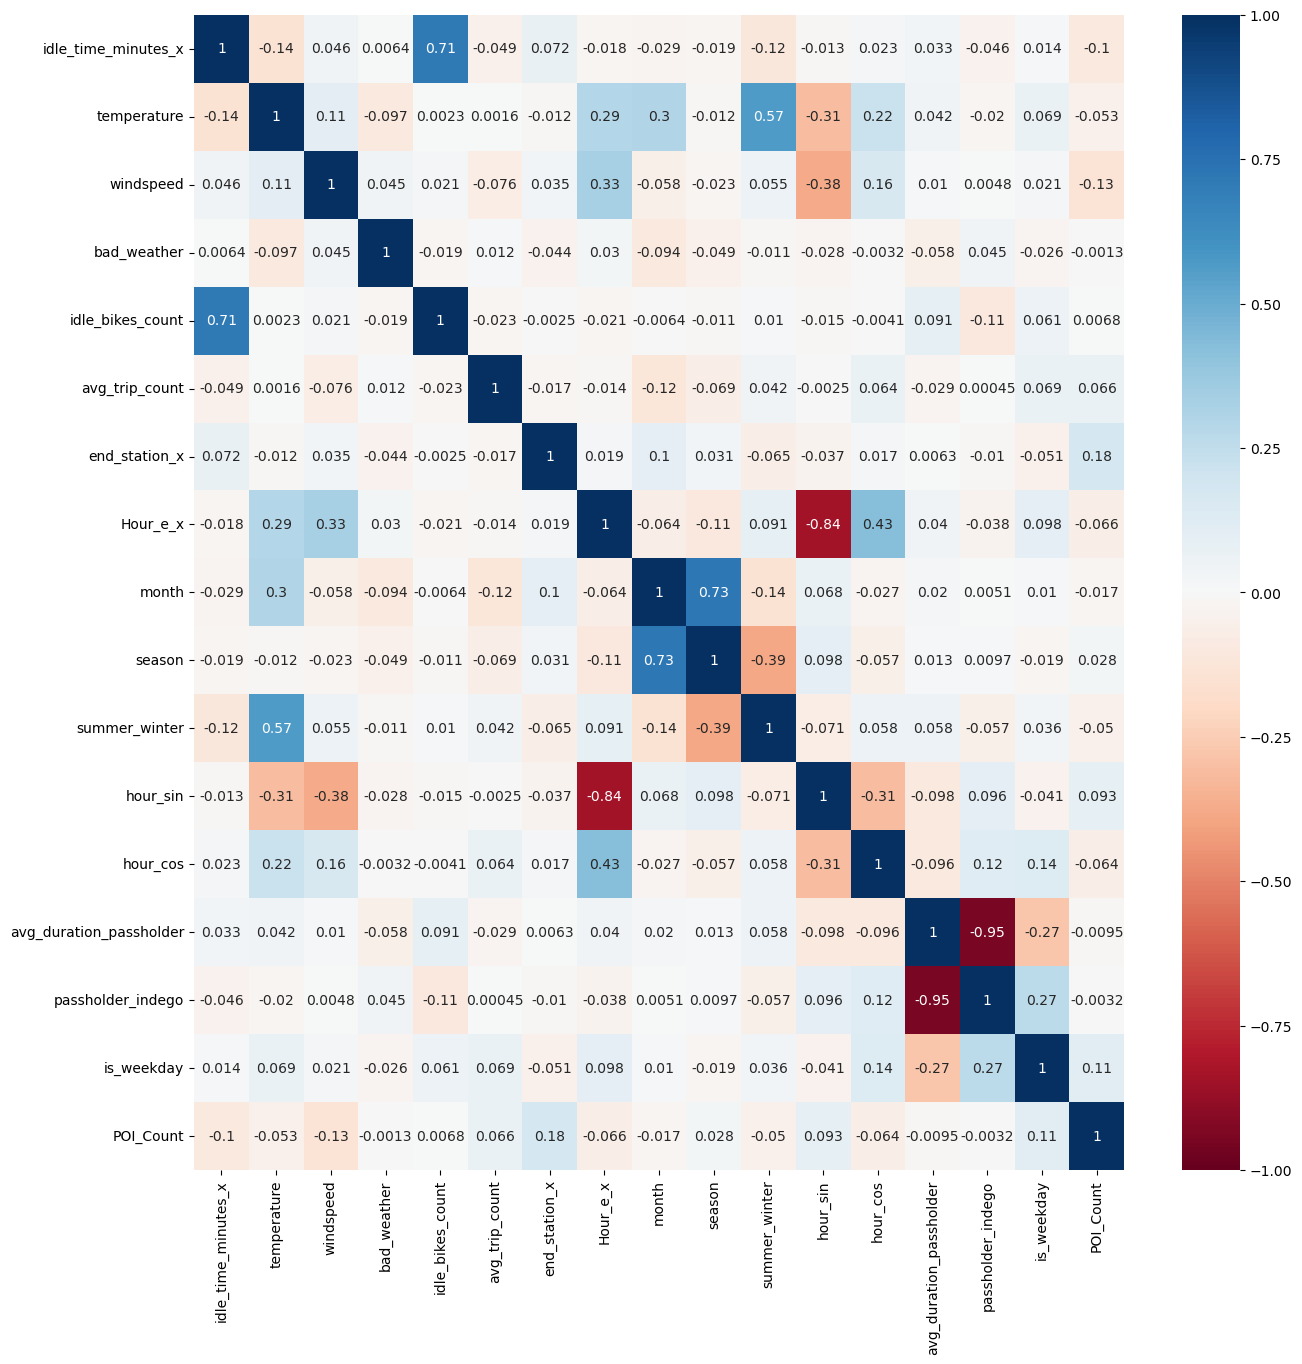

In [14]:
features = predict_bike[['idle_time_minutes_x','temperature', 'windspeed', 'bad_weather', 'idle_bikes_count', 'avg_trip_count',
                 'end_station_x', 'Hour_e_x', 'month', 'season', 'summer_winter',
                'hour_sin', 'hour_cos', 'avg_duration_passholder', 'passholder_indego','is_weekday','POI_Count']]
corr = features.corr()
# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [16]:
predict_bike.rename(columns={
    'end_station_x': 'end_station',
    'Hour_e_x': 'hour',
    'idle_time_minutes_x': 'idle_time',
    'bad_weather': 'bad_weather_condition',
}, inplace=True)

In [17]:
predict_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   end_station              686 non-null    int64  
 1   hour                     686 non-null    int64  
 2   avg_trip_count           686 non-null    float64
 3   idle_time                686 non-null    float64
 4   idle_bikes_count         686 non-null    int64  
 5   temperature              686 non-null    float64
 6   windspeed                686 non-null    float64
 7   bad_weather_condition    686 non-null    int64  
 8   month                    686 non-null    int64  
 9   season                   686 non-null    float64
 10  hour_sin                 686 non-null    float64
 11  hour_cos                 686 non-null    float64
 12  avg_duration_passholder  686 non-null    float64
 13  passholder_indego        686 non-null    int32  
 14  is_weekday               6

In [19]:
predict_bike.to_csv('predict_bike.csv', index=False)